In [1]:
import matplotlib as mpl
import numpy as np

In [2]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths= None, fontext= 'ttf')
mpl.rcParams['font.family'] ='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] =False

In [3]:
import konlpy

## 한글 텍스트 전처리

In [7]:
with open('gift.txt', 'rt', encoding='UTF8') as fp:
    text = fp.read()

In [8]:
from konlpy.tag import Okt
okt = Okt()

In [9]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [10]:
# 영문자, 숫자 제거
import re
new_tokens = []
for token in tokens:
    gift = re.sub('[A-Za-z0-9]','',token) # \w와 같은 의미
    if gift:
        new_tokens.append(gift)

In [11]:
import nltk

In [12]:
import matplotlib.pyplot as plt

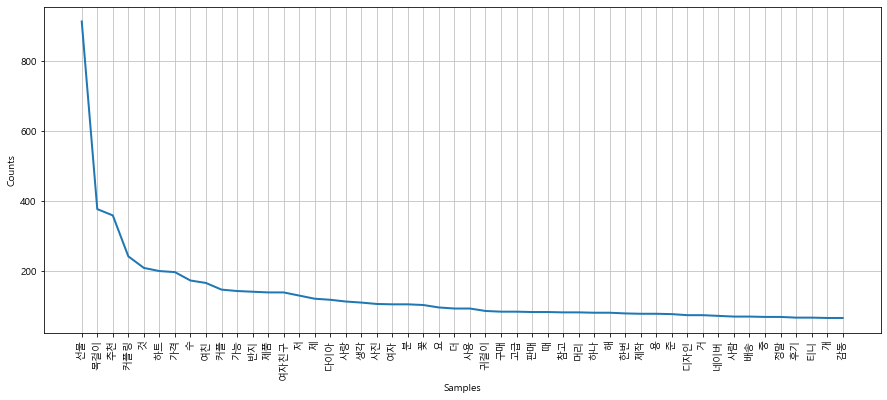

In [14]:
gift = nltk.Text(new_tokens,name='여자친구선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [28]:
stoptext = """
    선물 추천 것 가격 수 가능 제품 여자친구 저 제 생각 여자 분 요 더 사용 구매 고급 판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 네이버 사람 배송 중 정말 후기 감동 공용 커플 몇개 투척 남녀 버핏 빅사 이즈 하프 공용 체크 라인 우정 싱글 단체
    남자 봄 가을 겨울 루즈 핏 스냅 패턴 보통 남여 인기 신상 클래식 로파 웨어 컬러 이 세상 손 핸드 버튼 아우 터 이드 주문 수량 이상 위 상품 총 금액 이전 통장 지금 바로 다음
    쿠폰 다운로드 회원 핑핑 넥 카라 곱창 끈 배송비 영문 레터 새틴 찜 추가 구성 선택 포인트 무료 홍보 색상 개 최소 옵션 박스 아래 로 뭐 깜짝 만큼 기분
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens

['반지',
 '목걸이',
 '가디건',
 '모자',
 '신지',
 '커플룩',
 '니트',
 '가디건',
 '가디건',
 '커플룩',
 '가디건',
 '니트',
 '가디건',
 '니트',
 '가디건',
 '니트',
 '가디건',
 '가디건',
 '브이넥',
 '가디건',
 '커플룩',
 '가디건',
 '레인보우',
 '링',
 '블랙',
 '볼캡',
 '모자',
 '야구모',
 '브랜드',
 '모자',
 '쇼핑',
 '도움',
 '채택',
 '파트너',
 '스',
 '커미션',
 '지급',
 '샵',
 '수호',
 '돼지',
 '디',
 '퓨저',
 '메이드',
 '샵',
 '샵',
 '공장',
 '율',
 '또',
 '개지',
 '림',
 '마크',
 '곤잘레스',
 '후드',
 '티',
 '스몰',
 '사인',
 '로고',
 '후디',
 '그레이',
 '노미',
 '네이션',
 '컴포저블',
 '팔찌',
 '링크',
 '직접',
 '골',
 '단',
 '팔찌',
 '노미',
 '네이션',
 '링크',
 '아이돌',
 '자주',
 '착용',
 '연예인',
 '선호',
 '주얼리',
 '브랜드',
 '협찬',
 '진행',
 '고해',
 '이니셜',
 '탄생석',
 '별자리',
 '링크',
 '의미',
 '팔찌',
 '강',
 '다니엘',
 '팔찌',
 '하니',
 '팔찌',
 '도',
 '소재',
 '최고급',
 '컬',
 '스틸',
 '소재',
 '알러지',
 '안심',
 '착용',
 '물',
 '땀',
 '샤워',
 '후',
 '물기',
 '움',
 '골드',
 '골드',
 '실버',
 '대가',
 '링크',
 '매',
 '기념일',
 '링크',
 '의미',
 '기념',
 '디자이너',
 '브랜드',
 '미뇽',
 '네프',
 '브랜드',
 '퀄리티',
 '보장',
 '드릴',
 '때문',
 '커플티',
 '미니',
 '커플티',
 '제격',
 '후드',
 '티',
 '더욱',
 '코디법',
 '실',
 '사이즈',
 '확인',
 '경우',
 '홈페이지'

## 워드클라우드 만들기

In [29]:
from wordcloud import WordCloud
from PIL import Image

In [30]:
data = gift.vocab().most_common(300)

In [35]:
path = 'C:/Windows/Fonts/malgun.ttf'
wc = WordCloud(
    font_path=path,relative_scaling=0.2,background_color='white'
).generate_from_frequencies(dict(data))

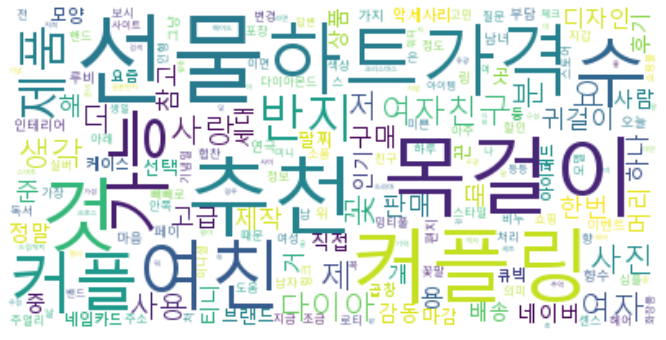

In [36]:
plt.figure(figsize=(12,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트 그림에 표시

In [33]:
mask = np.array(Image.open('heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [37]:
wc = WordCloud(
    font_path=path,relative_scaling=0.2,mask=mask,background_color='white', min_font_size=1,max_font_size=120
).generate_from_frequencies(dict(data))


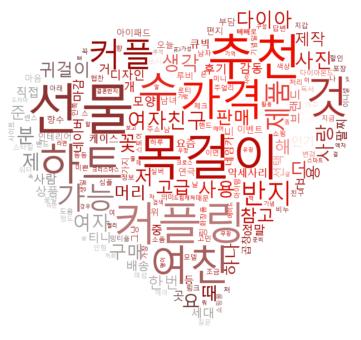

In [39]:
plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()